# **Importando e visualizando a base dos dados**

In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Importando a base em excel (xlsx)
base = pd.read_excel('engajamento_instagram.xlsx')
# Fazendo uma copia para manter os dados originais
dados = base.copy()

In [ ]:
# Visualisando as 5 primeiras linhas
dados.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


### Como está na descrição foi pedido para não considerar a coluna visualizações, por isso será feita a retirada dessa coluna


In [ ]:
# Apagando a coluna visualizações
dados = dados.drop('Visualizações',axis=1)

In [ ]:
#Visualizando novamente as 5 primeiras linhas para conferir se excluiu corretamente a coluna visualizações
dados.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [ ]:
# Tamanho da base
dados.shape

(52, 9)

In [ ]:
# Verificando as informações da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


### Carrossel possui apenas 8 valores não nulos, vamos entender esses valores

In [ ]:
dados['Carrossel'].value_counts()

Carrossel
S    8
Name: count, dtype: int64

### Os valores nulos são de postagem que não são carrossel, ou seja, os 8 valores preenchidos com "S" são para indicar postagens que são carrossel, sendo assim o nulo deveria ser "N".

# **Tratando Valores Nulos**

In [ ]:
# Filtrando os valores nulos da coluna carrossel
dados.loc[dados['Carrossel'].isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [ ]:
# Filtrando os valores não nulos
dados.loc[dados['Carrossel'].notnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331


In [ ]:
# Atribuindo o valor 'N' para os dados nulos da coluna
dados.loc[dados['Carrossel'].isnull(),"Carrossel"] = "N"

In [ ]:
# Conferindo se o processo ocorreu corretamente verificando a quantidade de nulos presente na coluna
dados['Carrossel'].isnull().sum()

0

In [ ]:
# Conferindo pelo metodo .info para ter uma visão mais abrange para verificar se não afetou outras colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


# Montando as informações estatísticas

In [ ]:
# Criando uma copia dos dados para retirar a coluna 'Data' para analisar somente 'Curtidas','Comentários' e 'Interações'
dados_analise = dados.copy()
dados_analise = dados_analise.drop('Data',axis=1)
dados_analise.describe()

,Curtidas,Comentários,Interacoes
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


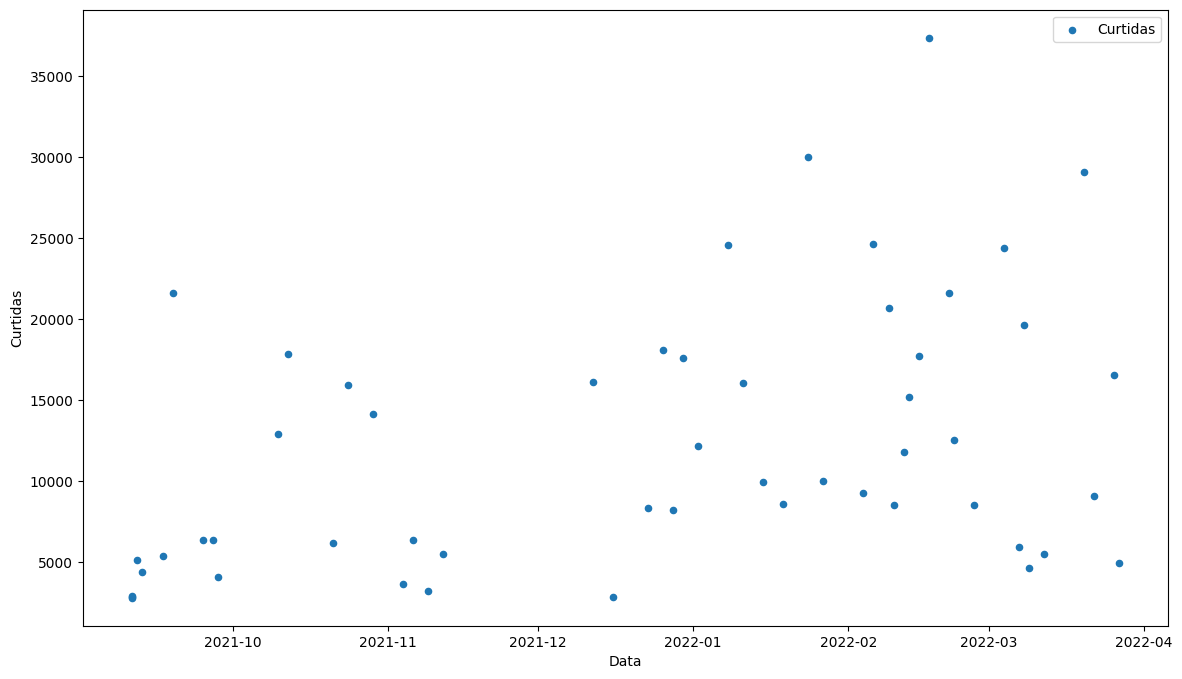

In [ ]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
dados.plot(kind="scatter" ,x="Data" ,y="Curtidas" ,label='Curtidas',figsize=(14,8));

A primeira vista deste gráfico podemos concluir que o aumento de seguidores não está relacionado diretamente ao aumento de curtidas, existem pontos especificos de datas de 2022 que contem a mesma quantidade de curtidas que 2021 mesmo
 que provavelmente o numero de seguidores venha aumentando com o tempo,
 ou seja, a data não é um fator predominante na quantidade de curtidas.

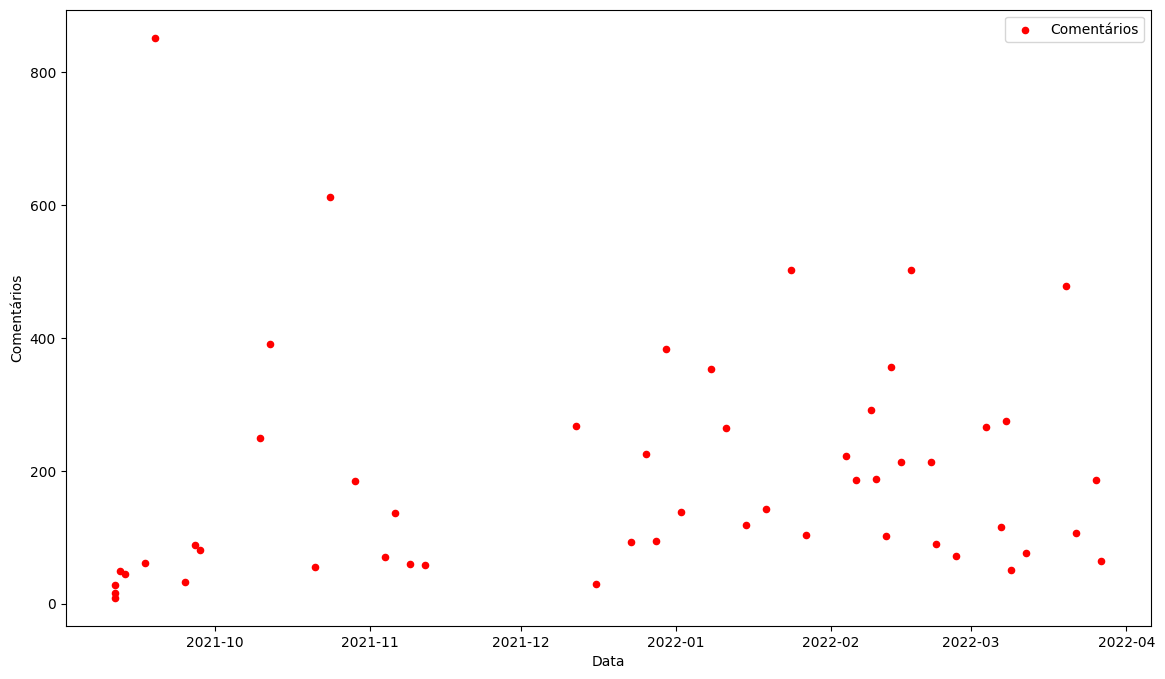

In [ ]:
# Plotando grafico de comentários
dados.plot(kind='scatter',x='Data',y='Comentários',color='red',label='Comentários',figsize=(14,8));

*   O gráfico e as informações estatíticas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários.
*   Precisamos verificar se existe um padrão usando as outras colunas.



# Pegando os 5 primeiros registros com mais e menos curtidas

In [ ]:
# Ordenando os valores por curtida descendente
dados.sort_values(by='Curtidas',ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [ ]:
# Ordenando os valores por curtida ascendente
dados.sort_values(by='Curtidas',ascending=True).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


*   Podemos notar que nesses 5 primeiros todas as postagens tem pessoas e são de campanha.
*   E nas 5 piores postagens não tinham pessoas e não eram de campanha.

**Isso pode ser um indicador de que pessoas e campanhas tem relação com as curtidas.**

In [ ]:
# Formatação para melhorar a visualização dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Agrupando as informações por tipo (O groupby nos permite agregar os dados, oque facilita muito a visualização).
dados.groupby("Tipo")["Curtidas"].mean()

Tipo
Foto    13,341.14
IGTV     6,833.40
Reels   14,873.00
Vídeo    8,141.50
Name: Curtidas, dtype: float64

*   Nesse caso pode parecer que videos e IGTV não são boas opções de escolha como estratégia, logo não devem ser utilizadas.

In [ ]:
# Aplicando a função agregando mais de uma coluna
dados.groupby(['Tipo','Pessoas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

*   Tendo como referência as colunas 'Tipo' e 'Pessoas' para aplicar a função de média sobre as curtidas e comentários podemos ver que as fotos, Reels e Videos com pessoas tem mais engajamento de forma geral do que as sem pessoas.


In [ ]:
# Somente para pessoas
dados.groupby('Pessoas')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50




*   Imagens com pessoas engajam muito mais para essa marca.




In [ ]:
# Somente para campanhas
dados.groupby('Campanhas')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


*   Quando é uma postagem de campanha também o engajamento é melhor.

In [ ]:
# Exemplo do erro de quando não é filtrado corretamente como será apresentado a seguir ---->>> ERRADO - forma incorreta de analisar
dados.groupby('Carrossel')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [ ]:
# Filtrando os dados para um tipo especifico
dados[dados['Tipo'] == 'Foto'].groupby('Carrossel')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


Nesse caso foi utilizado um filtro para selecionar um tipo especifico porque não existem por exemplo um reels de carrossel, então o resultado sem esse filtro não seria correto já que carrossel é composto de fotos.

*   Sem usar carrossel é melhor do que quando usamos, então não é algo que impacta no resultado em si.




In [ ]:
# Agregando por pessoas e campanhas
dados.groupby(['Pessoas','Campanhas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

*   Aqui podemos ver que quando na publicação tem pessoas e é uma campanha é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha) passa para quase 10 mil e se não tiver pessoas chega no maximo a 5,8 mil mesmo em campanha.

*   Nesse caso já conseguimos mostrar para a empresa a importância de incluir pessoas usando seus produtos, oque gera um aumento considerável no engajamento.



In [ ]:
dados.groupby(['Pessoas','Campanhas','Tipo'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

*   Analizando novamente os vídeos, podemos ver que não é algo ruim de se utilizar se tiver pessoas. Quando feito em campanha e com pessoas ele teve um resultado bom de 16,4 mil curtidas.

*   Oque pode ter levado a média para baixo é que poderia ter videos somente com pessoas, somente com campanhas ou nenhum dos dois. Não temos nenhum vídeo apenas com um dos dois.

* Já a IGTV, mesmo tendo pessoas, não teve um bom resultado.

In [ ]:
dados[dados['Tipo'] == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576




*   Aqui percebemos que houve 4 tentativa de postar videos mostrando os produtos sem nenhuma pessoa e sem campanha e o resultado foi baixo, porem, quando foi feito com pessoas e com campanha o resultado foi bom!




# Conclusões


*   Postagens incluindo pessoas e em campanha engajam muito mais que aquelas que não possui ninguém ou não estando em campanha.
*   Postagens em épocas de campanha também possuem um melhor engajamento.
*   Com esses dados, o carrossel não foi um diferencial para melhorar o engajamento da marca.

